In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import platform

In [2]:
df = pd.read_csv('final_sleep_analysis.csv')

In [3]:
features = ['Core', 'Deep', 'REM', 'Awake', 'InBed', 'TotalSleep', 'BedTime_Offset']
x = df.loc[:, features].values
y = df.loc[:, 'Date'].values

In [4]:
x.size

1750

In [5]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, 
                           columns=['PC1', 'PC2'])

In [6]:
print("\n--- 目的1：主成分の解釈（因子負荷量） ---")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print(loadings)
print("-" * 30)


--- 目的1：主成分の解釈（因子負荷量） ---
                     PC1       PC2
Core            0.462232 -0.328184
Deep            0.311624 -0.342061
REM             0.208543  0.706080
Awake           0.095470  0.364803
InBed           0.401366  0.343967
TotalSleep      0.541877 -0.151827
BedTime_Offset -0.426499 -0.047903
------------------------------


In [7]:
print("--- 目的1：次元削減の効果 ---")
print(f"各主成分の寄与率（Explained Variance Ratio）: {pca.explained_variance_ratio_}")
print(f"累積寄与率: {sum(pca.explained_variance_ratio_):.2f}")

--- 目的1：次元削減の効果 ---
各主成分の寄与率（Explained Variance Ratio）: [0.43629074 0.17719267]
累積寄与率: 0.61


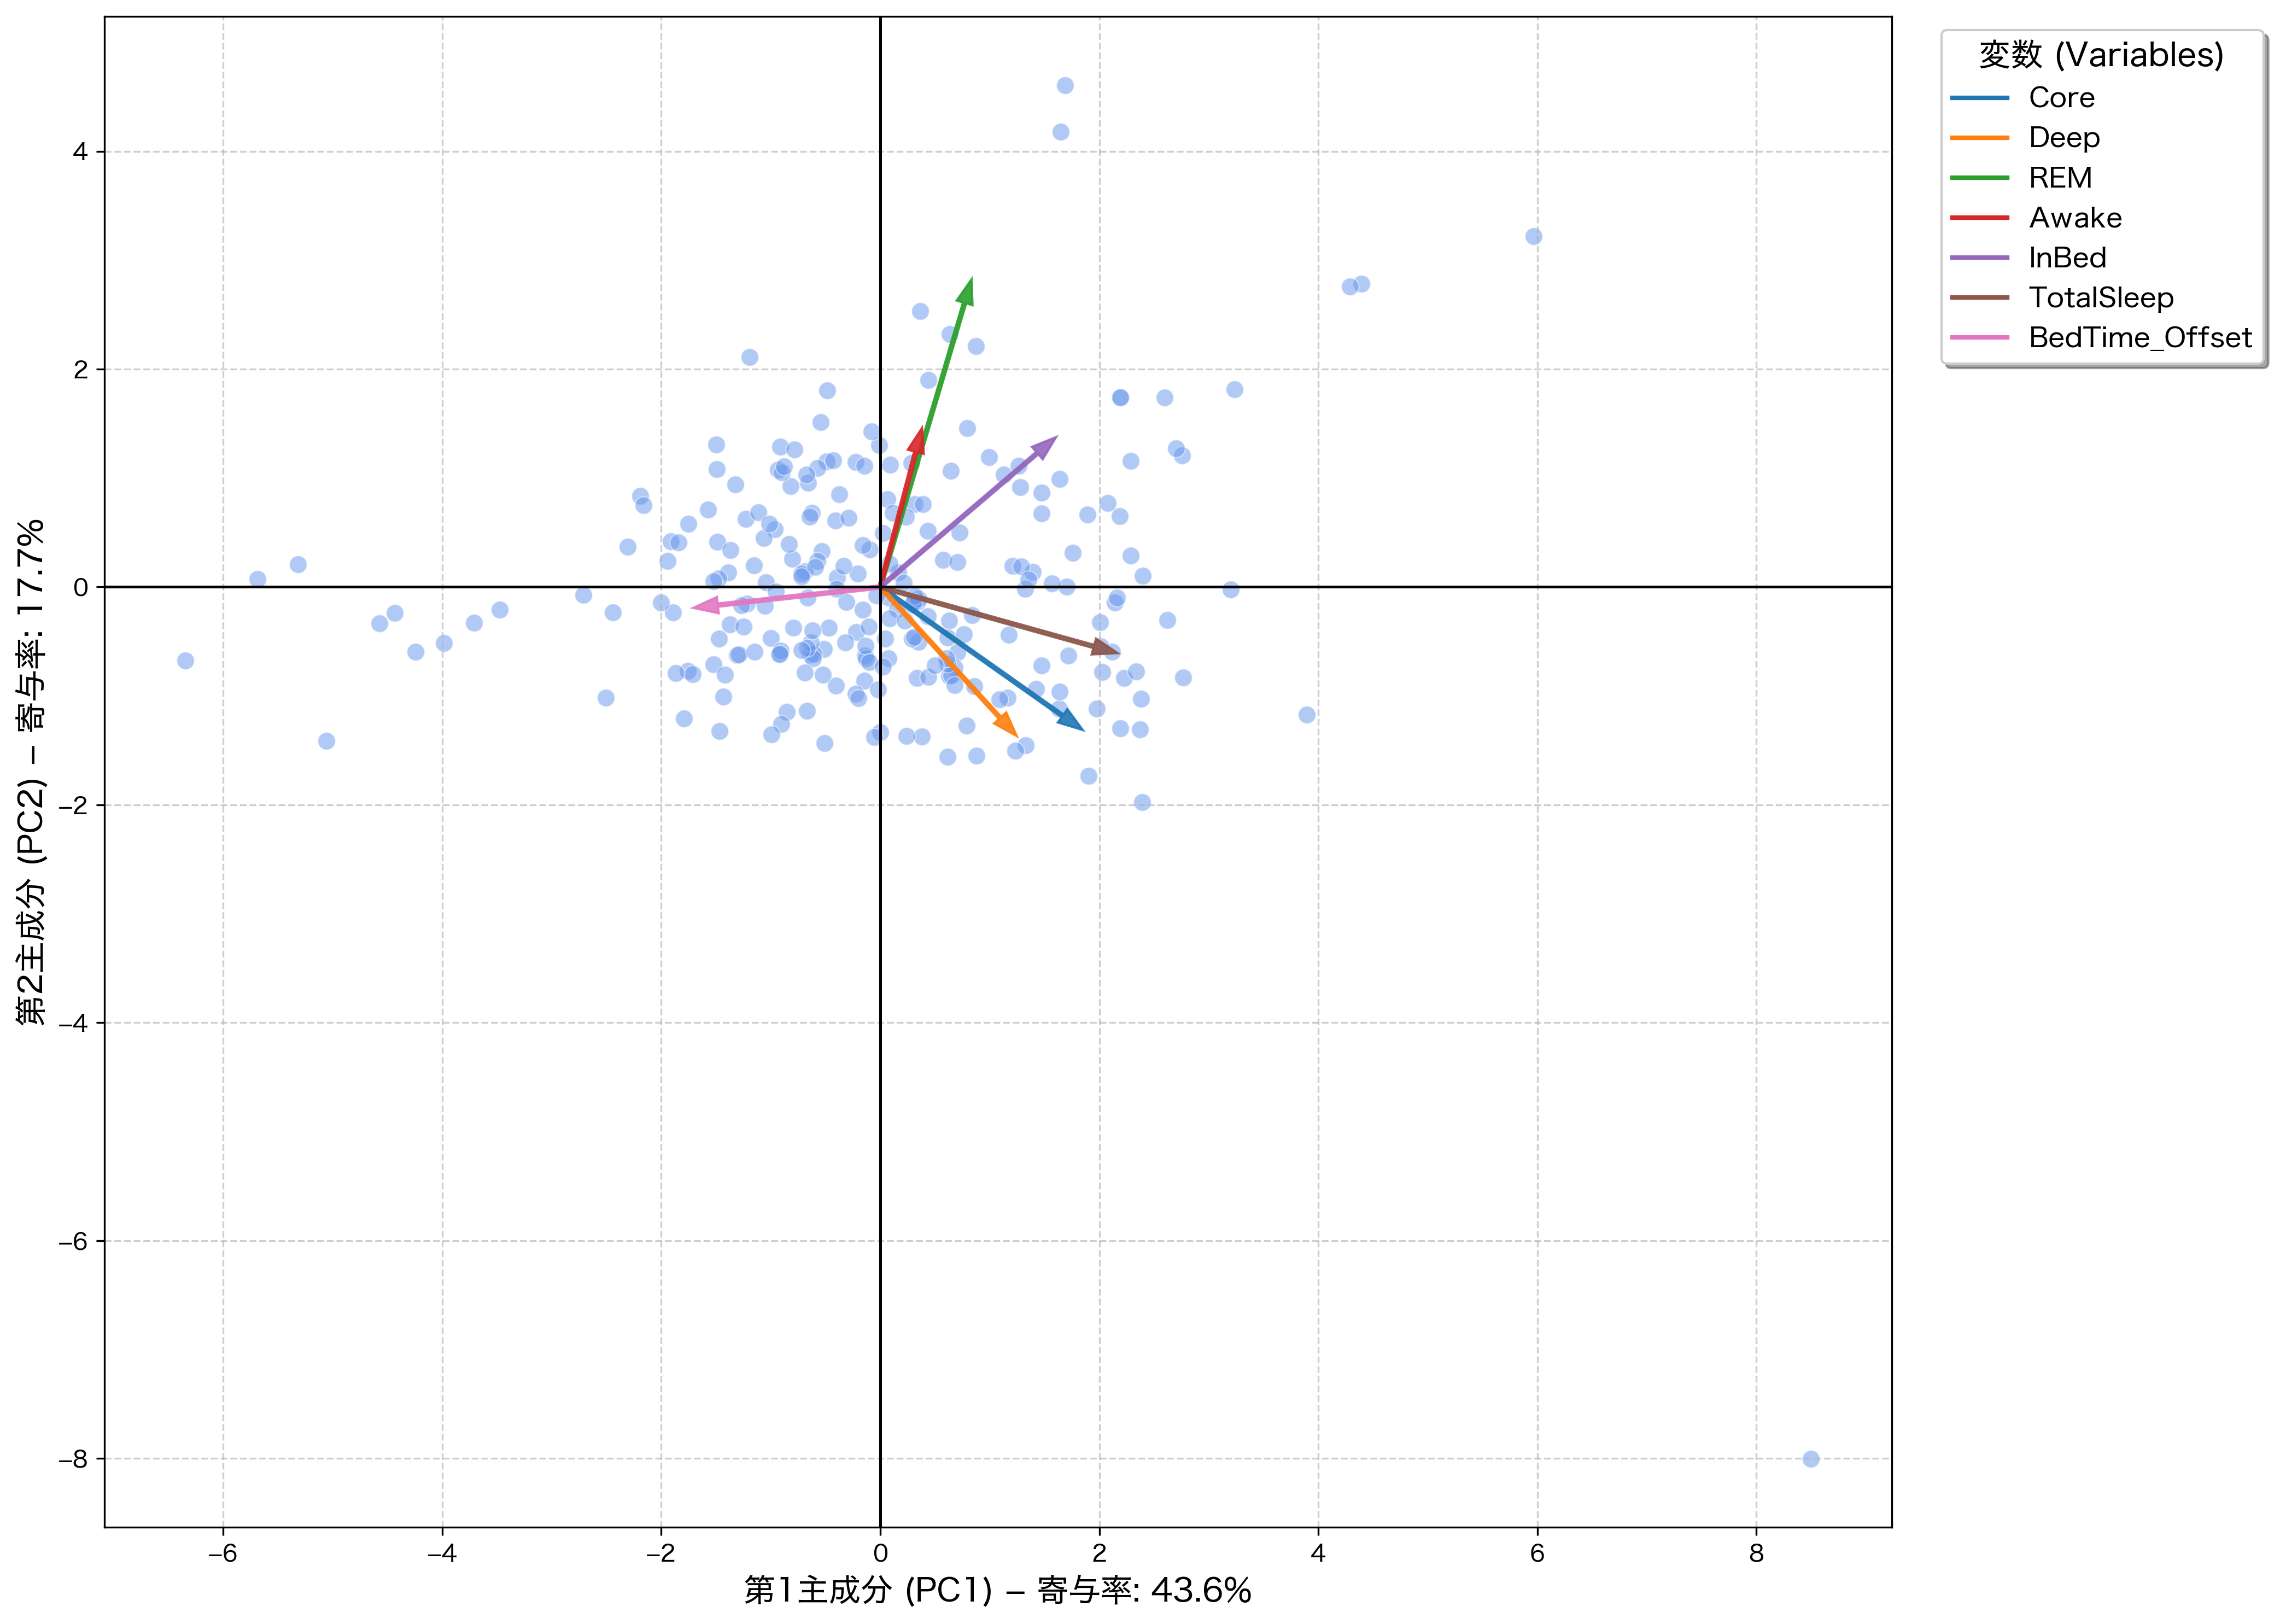

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Hiragino Sans'  # this configuration may only be available on MacOS
plt.figure(figsize=(14, 10), dpi=300)

plt.scatter(
    principalDf['PC1'],
    principalDf['PC2'],
    alpha=0.5,
    s=60,
    c='cornflowerblue',
    edgecolors='white',
    linewidth=0.5,
    zorder=1
)

scale_factor = 4.0
colors = plt.get_cmap('tab10')
for i, feature in enumerate(features):
    current_color = colors(i)
    
    plt.arrow(
        0,
        0,
        pca.components_[0, i] * scale_factor,
        pca.components_[1, i] * scale_factor,
        color=current_color,
        alpha=0.9,
        width=0.03,
        head_width=0.15,
        length_includes_head=True,
        zorder=2
    )
    plt.plot([], [], color=current_color, linewidth=2, label=feature)

plt.xlabel(
    f'第1主成分 (PC1) − 寄与率: {pca.explained_variance_ratio_[0] * 100:.1f}%',
    fontsize=14
)
plt.ylabel(
    f'第2主成分 (PC2) − 寄与率: {pca.explained_variance_ratio_[1] * 100:.1f}%',
    fontsize=14
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', lw=1.2, linestyle='-')
plt.axvline(0, color='black', lw=1.2, linestyle='-')

plt.legend(
    title="変数 (Variables)",
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    shadow=True
)

plt.tight_layout()
# plt.savefig('pca_result_biplot_legend.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>